In [43]:
import numpy as np
from keras.datasets import mnist
from keras import layers
import tensorflow as tf
from keras.utils import to_categorical

In [44]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Shape of x_train: " + str(x_train.shape))

Shape of x_train: (60000, 28, 28)


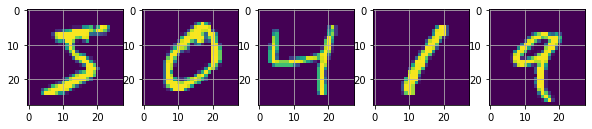

In [45]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,5, figsize=(10, 10))
for i in range(0,5):
    train_img = x_train[i,:,:]
    axs[i].imshow(train_img)
    axs[i].grid(True)

plt.show()

In [46]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("After editing the shape of x_train:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

After editing the shape of x_train: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [124]:
from keras import Sequential, Input, layers
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(32, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ], name="MNIST_CONV_NET"
)

model.summary()

Model: "MNIST_CONV_NET"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)           

In [125]:
from keras.losses import CategoricalCrossentropy
batch_size = 128
epochs = 15

model.compile(loss=CategoricalCrossentropy(), optimizer="adam", metrics=["acc"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - ETA: 0s - loss: 0.3916 - acc: 0.8756

c:\Users\sandr\source\repos\SDU_Deep_Learning\venv\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54000/54000 [==============================] - 19s 357us/sample - loss: 0.3916 - acc: 0.8756 - val_loss: 0.0822 - val_acc: 0.9768
Epoch 2/15
54000/54000 [==============================] - 17s 320us/sample - loss: 0.1058 - acc: 0.9674 - val_loss: 0.0578 - val_acc: 0.9838
Epoch 3/15
54000/54000 [==============================] - 17s 319us/sample - loss: 0.0770 - acc: 0.9762 - val_loss: 0.0518 - val_acc: 0.9872
Epoch 4/15
54000/54000 [==============================] - 17s 321us/sample - loss: 0.0635 - acc: 0.9802 - val_loss: 0.0393 - val_acc: 0.9892
Epoch 5/15
54000/54000 [==============================] - 17s 319us/sample - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0387 - val_acc: 0.9897
Epoch 6/15
54000/54000 [==============================] - 18s 325us/sample - loss: 0.0469 - acc: 0.9850 - val_loss: 0.0363 - val_acc: 0.9887
Epoch 7/15
54000/54000 [==============================] - 17s 317us/sample - loss: 0.0420 - acc: 0.9861 - val_loss: 0.0353 - val_acc: 0.9885
Epoch 8/15
54000/54000 [

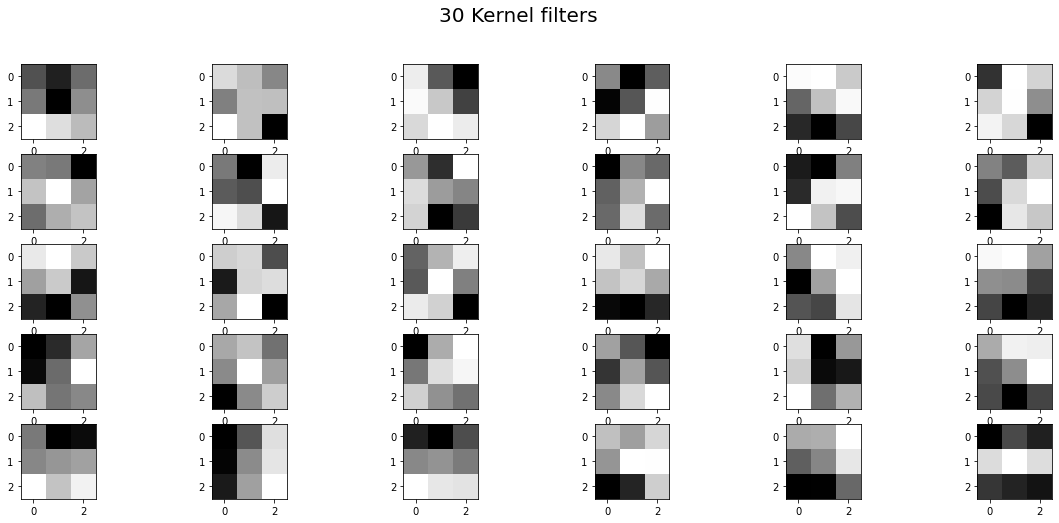

In [134]:
import matplotlib.pyplot as plt
def get_kernels(layer_name, rows, columns):
    kernels = model.get_layer(name=layer_name).get_weights()[0][:,:,0, :]
    index = 0
    fig, ax = plt.subplots(rows,columns, figsize=(20, 8))
    for row in range(0,rows):
        for col in range(0,columns):
            ax[row][col].imshow(kernels[:,:,index], cmap="gray")
            index += 1
    plt.suptitle(str(rows*columns) + ' Kernel filters',fontsize=20)
    plt.show()

get_kernels("conv2d_10", 5, 6)

c:\Users\sandr\source\repos\SDU_Deep_Learning\venv\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


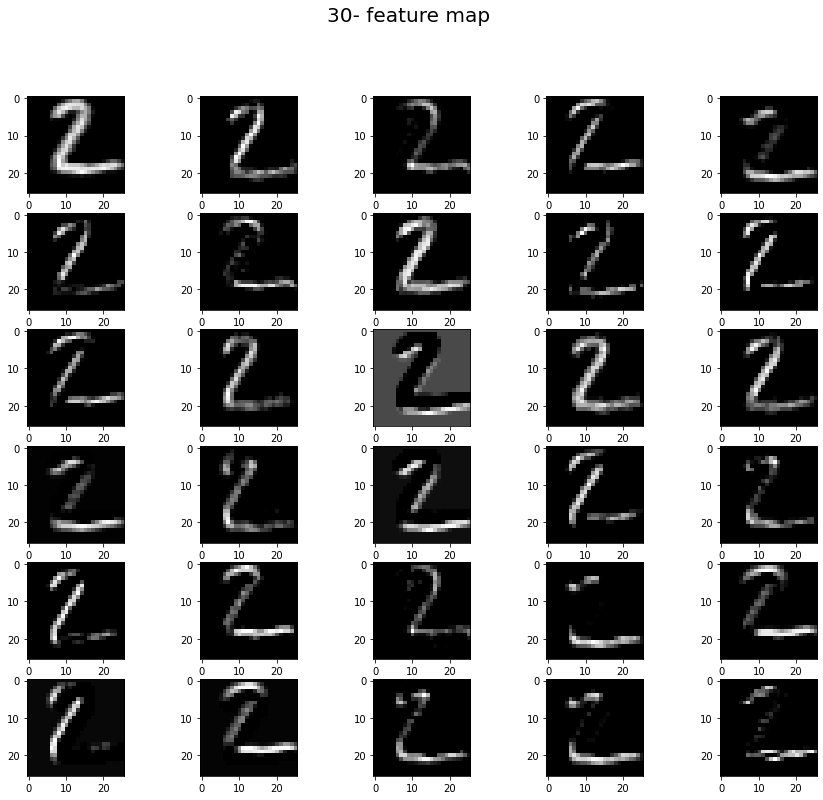

In [158]:
from keras.models import Model
def plot_feature_map(rows, columns):
    activation_model = Model(inputs=model.input, outputs=model.layers[0].output)
    activations = activation_model.predict(x_test[1].reshape(1,28,28,1))
    act_index = 0
    fig, ax = plt.subplots(rows,columns, figsize=(rows*2.5, columns*2.5))
    for row in range(0,rows):
        for col in range(0,columns):
            ax[row][col].imshow(activations[0, :, :, act_index], cmap="gray")
            act_index+= 1
    plt.suptitle(str(rows*columns) + '- feature map',fontsize=20)
    plt.show()   

plot_feature_map(6,5) 


In [130]:
import numpy as np
print(history.history.keys())
loss = history.history["loss"]
accuracy = history.history["acc"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_acc"]
max_acc = accuracy[np.argmax(accuracy)]
max_val_acc = val_accuracy[np.argmax(val_accuracy)]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


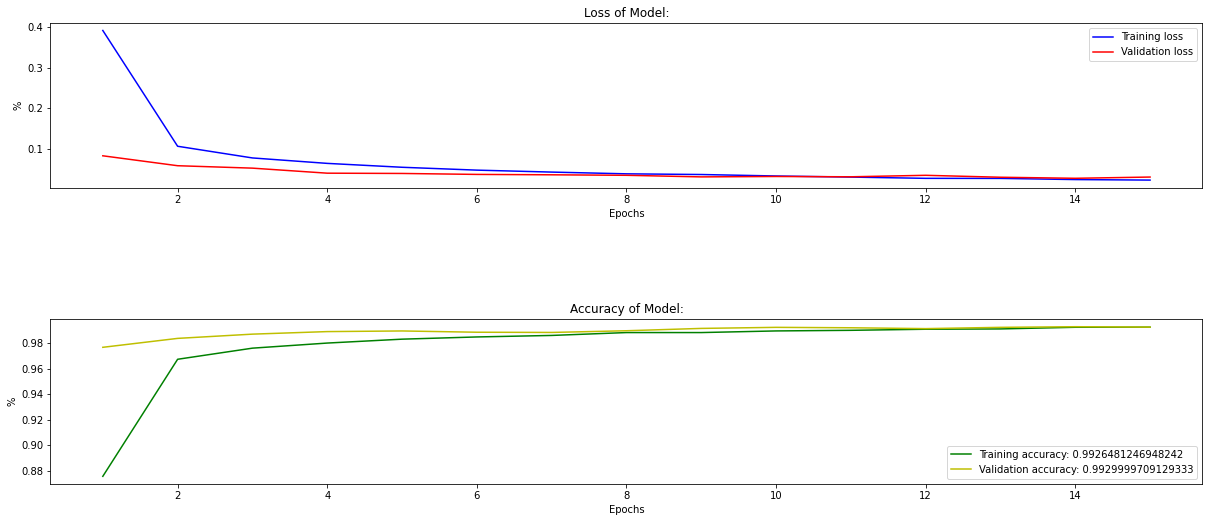

In [131]:
import matplotlib.pyplot as plt
epochs_size = 15
epochs = range(1, (epochs_size+1))
ig, ax = plt.subplots(2, figsize=(20, 8))
ax[0].plot(epochs ,loss, "b", label="Training loss")
ax[0].plot(epochs, val_loss, "r", label="Validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("%")
ax[0].set_title("Loss of Model:")
ax[0].legend()
ax[1].plot(epochs, accuracy, "g", label="Training accuracy: " + str(max_acc))
ax[1].plot(epochs, val_accuracy, "y", label="Validation accuracy: " + str(max_val_acc))
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("%")
ax[1].set_title("Accuracy of Model:")
ax[1].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

plt.show()


In [132]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027938436479448863
Test accuracy: 0.9904


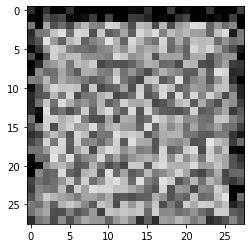

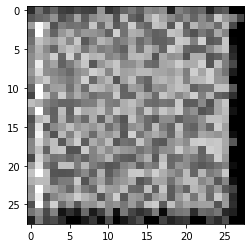

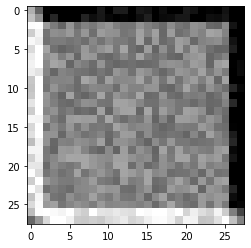

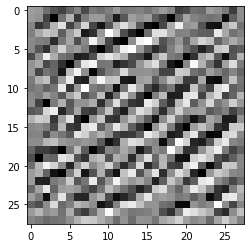

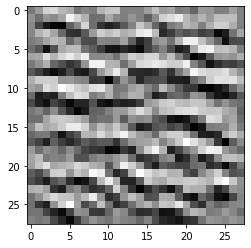

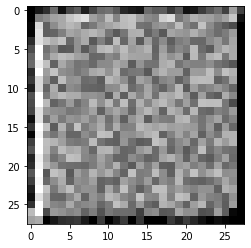

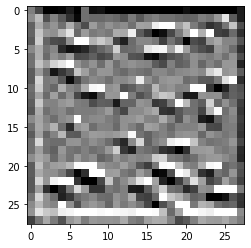

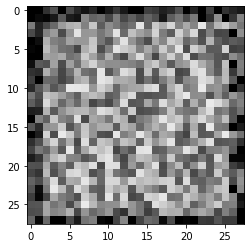

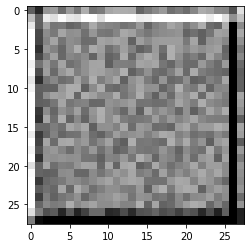

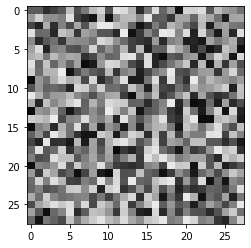

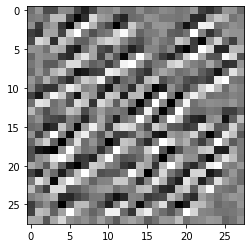

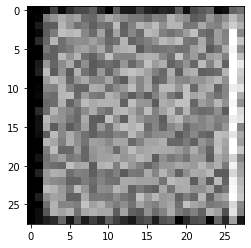

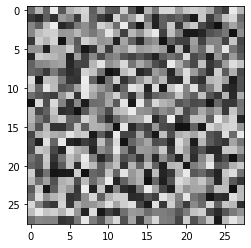

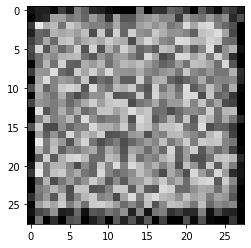

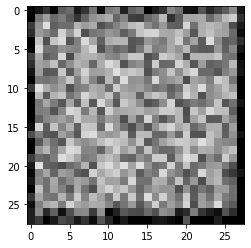

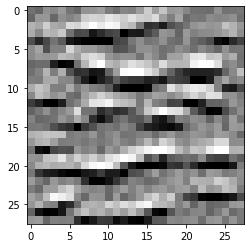

In [164]:
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from keras.utils import save_img
from keras.applications import vgg16
from keras import backend as K

#vgg = vgg16.VGG16(weights='imagenet', include_top=False)
vgg = model

layer_dict = dict([(layer.name, layer) for layer in vgg.layers[0:]])

input_img = vgg.inputs[0]

layer_name = "conv2d_10"
 # any filter of that layer
for filter_index in range(0,16):
    
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + K.epsilon())

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    output_dim = (28, 28)

    input_img_data = np.random.random((1, output_dim[0], output_dim[1], 1))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    for _ in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 1

    input_img_data -= input_img_data.mean()
    input_img_data /= (input_img_data.std() + K.epsilon())
    input_img_data *= 0.25

    # clip to [0, 1]
    input_img_data += 0.5
    input_img_data = np.clip(input_img_data, 0, 1)

    # convert to RGB array
    input_img_data *= 255
    input_img_data = np.clip(input_img_data, 0, 255).astype('uint8')

    def _draw_filters(filters, n=None):
        """Draw the best filters in a nxn grid.
        # Arguments
            filters: A List of generated images and their corresponding losses
                    for each processd filter.
            n: dimension of the grid.
            If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                width_margin: width_margin + output_dim[0],
                height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        #save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)
        plt.imshow(stitched_filters)
        plt.show()


    _draw_filters([(input_img_data, 0.1)])


In [1]:
predictions = model.predict(x_test)
# Softmax (Multi class)
predictions = predictions.argmax(axis=-1)
wrong_data = x_test[y_test != predictions]


NameError: name 'model' is not defined